# ЛАБОРАТОРНАЯ РАБОТА № 2.3. Адаптивные модели. Критерии адекватности модели


## Адаптивные модели
**Адаптивные модели прогнозирования** - модели, способные изменять свою структуру и параметры, приспосабливаясь к изменению условий.

Последовательность процесса адаптации в основном выглядит следующим образом. 
- Пусть модель находится в некотором исходном состоянии (т.е. определены текущие значения ее параметров) и по ней делается прогноз. 
- Далее вычисляем ошибку прогнозирования (насколько далек результат, полученный по модели, от фактического значения ряда).
- Через обратную связь ошибка прогнозирования поступает на вход системы и используется для уточнения параметров модели. На изменения ряда модель должна отвечать "компенсирующими" изменениями. 
- Затем делается прогноз на следующий момент времени, и весь процесс повторяется.


Все адаптивные модели делятся на два класса: модели скользящего среднего (MA-модели, moving average) и авторегрессии (AR-модели, autoregression). 

- В MA-моделях, оценкой текущего уровня (наблюдения) является взвешенное среднее всех предшествующих уровней, причем вес (множитель), который отражает информационную ценность наблюдения, тем больше, чем ближе оно находится к текущему уровню. Такие модели хорошо отражают тенденцию, но не позволяют отражать колебания, например, сезонные. 
- В AR-моделях сглаживание производятся с помощью параметра сглаживания, который принимает значения в интервале от 0 до 1. Параметр сглаживания принимает значение больше 0.5 для быстроизменяющихся процессов и меньше 0.5 для относительно стабильных процессов. 

## Модель Брауна

Модель Брауна является МА-моделью  и описывает процессы с линейной и параболическим трендом, а также случайные процессы без тренда. 

Построение линейной модели Брауна имеет следующие **этапы:** 
1. По первым пяти точкам временного ряда с помощью метода наименьших квадратов оцениваются значения параметров линейной модели для нулевого момента времени: 
$$
    \hat{y}(t) = a_0 + a_1\cdot t
$$
2. С использованием параметров $a_0$ и $a_1$, найденных на предыдущем этапе, находим прогноз на шаг вперед ($\tau=1$): 
$$
    \hat{y}_{\tau}(t) = a_0(t) + a_1(t)\cdot \tau, \qquad \hat{y}_{\tau}(1) = a_0(0) + a_1(0)
$$
3. Находим величину отклонения фактического значения экономического показателя от расчетного (в данном случае $t = 1$): 
$$
    \varepsilon(t) = y(t)-\hat{y}_{\tau}(t)
$$

4. Корректируем параметры модели по формулам: 
$$
\begin{aligned}
    a_0(k) &= a_0(k-1) + a_1(k-1) + (1-\beta^2) \cdot \varepsilon(k),\\
    a_1(k) &= a_1(k-1) + (1-\beta)^2\varepsilon(k),
\end{aligned}
$$
где параметр $\beta$ - коэффициент дисконтирования, характеризующий обесценение данных наблюдения за единицу времени 

5. С помощью скорректированных на предыдущем шаге параметров находим прогноз на следующий момент времени ($\tau=1$): 
$$
    \hat{y}_{\tau} (t) = a_0(t) + a_{1}(t)
$$
и переходим на шаг 3.


6. Точечный прогноз на $t$ отсчетоврассчитывается по формуле 
$$
    \hat{y}(n+t) = a_0(n) + a_1(n)\cdot t, \qquad t = 1, 2,\ldots, T,
$$
где $T$ - горизонт прогнозирования.


In [1]:
#Тут будет пример

## Проверка адекватности модели
**Адекватной** признается модель, которая порождает остаточный ряд со случайными центрированными некоррелированными нормально распределенными элементами. 


Проверка адекватности сводится к выявлению перечисленных свойств остаточного ряда:

1. **Проверка случайности ряда остатков** устанавливает отсутствие систематической ошибки. Для этого используется
критерий числа поворотных точек в распределении ряда остатков. 
Точка в этом распределении считается *поворотной*, если она меньше или больше двух соседних точек. 
Если число поворотных точек удовлетворяет неравенству
$$
p > \left\lfloor \frac{2(N-2)}{3} - 2\sqrt{\frac{16N-29}{90}} \right\rfloor,
$$
то уровни ряда остатков являются случайными и систематическая ошибка отсутствует.

2. **Проверка отсутствия автокорреляции в ряде остатков.** 
Для проверки обычно используется критерий Дарбина-Уотсона 
   - вычисляется статистика
      $$
         d =\frac{\sum_{t=2}^n \big(\varepsilon(t)-\varepsilon(t-1)\big)^2}{\sum_{t=1}^n \varepsilon(t)^2} \in [0;4]
      $$
   - Из [таблиц](https://real-statistics.com/statistics-tables/durbin-watson-table/) берутся критические значения $d_{L,\alpha}$ и $d_{U,\alpha}$
   - Если $d<2$, проверяется гипотеза $H_0\colon \rho \leqslant 0$ с альтернативой $H_1\colon \rho>0$ используются следующие сравнения:
      * Если  $d<d_{L,\alpha}$, то гипотеза о независимости случайных отклонений отвергается (присутствует положительная автокорреляция)
      * Если $d>d_{U,\alpha}$, то нет оснований отвергать гипотезу о независимости случайных отклонений
      * В иных случаях не зватает информации для принятия решения.
   - Если $d>2$, выполняется проверка гипотезы $H_0\colon \rho \geqslant 0$ с альтернативой $H_1\colon \rho<0$ используются следующие неравенства :
      * Если $4-d < d_{L,\alpha}$, то гипотеза о независимости случайных отклонений отвергается (присутствует отрицательная автокорреляция)
      * Если $4-d > d_{U,\alpha}$, то нет оснований отвергать гипотезу о независимости случайных отклонений
      * В иных случаях не зватает информации для принятия решения.
3. **Проверка стационарности ряда остатков** - остутсвие зависимости закона распределения от момента наблюдения выполняется тестом расширенным тестом Дикки-Фуллера (ADF)
4. **Проверка соответствия ряда остатков нормальному распределению**. Для этого используется тест Шапиро-Уилка.  




## Задание 1
1. Выполнить прогнозирование цены закрытия акций адаптивной моделью Брауна и трехпараметрической моделью Хольта-Винтерса. 
2. Оценить адекватность моделей.
3. Сравнить качество прогнозирования.

Данные о ценах закрытия акций можно взять на сайте [www.finam.ru](www.finam.ru): 

Для получения временного ряда 
1. Перейдите на сайте [www.finam.ru](www.finam.ru) по пути `Котировки/ Акции/Выбрать инструмент
2. Выберите акции, например, Сбербанк
3. Запустите `Экспорт котировок`.
4. В открывшемся меню укажите 
    - интервал 1 день
    - цена закрытия (close) 
    - ....
    - Получить файл.


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Укажем путь к файлу
file_path = 'AFLT.csv'

# Загрузим данные из CSV файла, используя ';' в качестве разделителя
# и выберем только необходимые колонки: <DATE> и <CLOSE>
try:
    df = pd.read_csv(file_path, sep=';', usecols=['<DATE>', '<CLOSE>'])

    # Переименуем колонки для удобства, убрав угловые скобки
    df.rename(columns={'<DATE>': 'DATE', '<CLOSE>': 'CLOSE'}, inplace=True)

    # Преобразуем колонку 'DATE' в формат datetime
    df['DATE'] = pd.to_datetime(df['DATE'], format='%y%m%d')

    # Установим колонку 'DATE' в качестве индекса DataFrame
    df.set_index('DATE', inplace=True)

    # Выведем первые несколько строк для проверки
    print("Первые 5 строк DataFrame:")
    print(df.head())

    # Выведем информацию о DataFrame, чтобы убедиться в правильности типов данных
    print("\nИнформация о DataFrame:")
    df.info()

except FileNotFoundError:
    print(f"Файл не найден по пути: {file_path}")
except Exception as e:
    print(f"Произошла ошибка при обработке файла: {e}")



Первые 5 строк DataFrame:
            CLOSE
DATE             
2024-05-02  50.66
2024-05-03  50.25
2024-05-06  49.68
2024-05-07  49.57
2024-05-08  50.23

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292 entries, 2024-05-02 to 2025-05-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   292 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB


In [10]:
# Выбираем нужный временной ряд (цены закрытия)
series = df['CLOSE']

# Разделение данных на обучающую и тестовую выборки (например, 80% на обучение, 20% на тест)
train, test = train_test_split(series, test_size=0.2, shuffle=False)

print(f"\nРазмер исходного ряда: {len(series)}")
print(f"Размер обучающей выборки: {len(train)}")
print(f"Размер тестовой выборки: {len(test)}")


Размер исходного ряда: 292
Размер обучающей выборки: 233
Размер тестовой выборки: 59


In [11]:
# --- Модель Брауна ---
def brown_model_forecast(train_series, test_series, beta=0.9, n_init=5):
    """
    Прогнозирование с использованием линейной модели Брауна.
    Делает одношаговые прогнозы для тестовой выборки, адаптируясь на каждом шаге.
    """
    history = list(train_series.copy())
    predictions = []

    if len(history) < n_init:
        raise ValueError(f"Обучающая выборка слишком мала для инициализации (нужно >= {n_init} точек).")

    # Инициализация параметров a0, a1 по первым n_init точкам
    y_init = np.array(history[:n_init])
    t_init = np.arange(n_init).reshape(-1, 1)

    model_ols = LinearRegression()
    model_ols.fit(t_init, y_init)
    a0_current = model_ols.intercept_
    a1_current = model_ols.coef_[0]

    # Прогрев модели на оставшейся части обучающей выборки
    for t_idx in range(n_init, len(history)):
        y_actual_train = history[t_idx]
        y_pred_train = a0_current + a1_current * 1
        error_train = y_actual_train - y_pred_train

        a0_prev = a0_current
        a1_prev = a1_current
        a0_current = a0_prev + a1_prev + (1 - beta**2) * error_train
        a1_current = a1_prev + (1 - beta)**2 * error_train

    # Прогнозирование на тестовой выборке
    predictions = []
    for t_idx in range(len(test_series)):
        y_pred_test = a0_current + a1_current * 1
        predictions.append(y_pred_test)

        y_actual_test = test_series.iloc[t_idx]
        error_test = y_actual_test - y_pred_test

        a0_prev = a0_current
        a1_prev = a1_current
        a0_current = a0_prev + a1_prev + (1 - beta**2) * error_test
        a1_current = a1_prev + (1 - beta)**2 * error_test

    return pd.Series(predictions, index=test_series.index)


# Параметры
beta_brown = 0.9
n_initial_brown = 5

try:
    brown_predictions = brown_model_forecast(train, test, beta=beta_brown, n_init=n_initial_brown)
    print("\n--- Прогноз моделью Брауна (первые 5 значений) ---")
    print(brown_predictions.head())
except Exception as e:
    print(f"Ошибка в модели Брауна: {e}")
    brown_predictions = pd.Series([np.nan]*len(test), index=test.index)


--- Прогноз моделью Брауна (первые 5 значений) ---
DATE
2025-03-26    76.275310
2025-03-27    75.841792
2025-03-28    75.014725
2025-03-29    73.546653
2025-03-30    72.142149
dtype: float64


In [18]:
# --- Модель Хольта-Винтерса с пошаговым прогнозированием ---
seasonal_period = 5
trend_type = 'add'
seasonal_type = 'add'

holt_winters_predictions = pd.Series(dtype=float, index=test.index)

if len(train) >= 2 * seasonal_period:
    try:
        # Инициализация модели на обучающих данных
        model = ExponentialSmoothing(
            train,
            trend=trend_type,
            seasonal=seasonal_type,
            seasonal_periods=seasonal_period,
            initialization_method='estimated'
        ).fit()
        
        # Пошаговое прогнозирование для тестовой выборки
        current_data = train.copy()
        for i in range(len(test)):
            # Прогноз на 1 шаг вперед
            pred = model.forecast(1)
            holt_winters_predictions.iloc[i] = pred.iloc[0]
            
            # Добавляем фактическое значение в историю (если доступно)
            # В реальном прогнозировании это значение будет неизвестно,
            # но для тестирования мы можем использовать тестовые данные
            current_data = pd.concat([current_data, test.iloc[[i]]])
            
            # Переобучаем модель с новыми данными
            model = ExponentialSmoothing(
                current_data,
                trend=trend_type,
                seasonal=seasonal_type,
                seasonal_periods=seasonal_period,
                initialization_method='estimated'
            ).fit()
            
    except Exception as e:
        print(f"Ошибка в модели Хольта-Винтерса: {e}")
        # Переключаемся на простую модель Хольта
        try:
            current_data = train.copy()
            model = Holt(current_data).fit()
            for i in range(len(test)):
                pred = model.forecast(1)
                holt_winters_predictions.iloc[i] = pred.iloc[0]
                current_data = pd.concat([current_data, test.iloc[[i]]])
                model = Holt(current_data).fit()
            print("\nИспользована модель Хольта вместо Хольта-Винтерса")
        except Exception as e2:
            print(f"Ошибка в модели Хольта: {e2}")
            holt_winters_predictions = pd.Series([np.nan]*len(test), index=test.index)
else:
    try:
        # Недостаточно данных для сезонности — используем модель Хольта
        current_data = train.copy()
        model = Holt(current_data).fit()
        for i in range(len(test)):
            pred = model.forecast(1)
            holt_winters_predictions.iloc[i] = pred.iloc[0]
            current_data = pd.concat([current_data, test.iloc[[i]]])
            model = Holt(current_data).fit()
        print("\nИспользована модель Хольта (недостаточно данных для сезонности)")
    except Exception as e:
        print(f"Ошибка в модели Хольта: {e}")
        holt_winters_predictions = pd.Series([np.nan]*len(test), index=test.index)

print("\n--- Прогноз моделью Хольта-Винтерса/Хольта (первые 5 значений) ---")
print(holt_winters_predictions.head())



--- Прогноз моделью Хольта-Винтерса/Хольта (первые 5 значений) ---
DATE
2025-03-26    74.755213
2025-03-27    73.673379
2025-03-28    71.156177
2025-03-29    67.034495
2025-03-30    66.664163
dtype: float64


In [19]:
# Функции для проведения тестов на остатках и расчета метрик ошибок.
def turning_points_test(residuals_arr):
    """
    Критерий числа поворотных точек для проверки случайности ряда.
    """
    n = len(residuals_arr)
    if n < 3:
        return False, 0, 0, 0 

    p = 0 # Счетчик поворотных точек
    for i in range(1, n - 1):
        # Условие поворотной точки (пик или впадина)
        if (residuals_arr[i-1] < residuals_arr[i] and residuals_arr[i] > residuals_arr[i+1]) or \
           (residuals_arr[i-1] > residuals_arr[i] and residuals_arr[i] < residuals_arr[i+1]):
            p += 1
    
    # Ожидаемое число поворотных точек и его дисперсия для случайного ряда
    expected_p = 2 * (n - 2) / 3
    variance_p = (16 * n - 29) / 90
    
    # Нижняя граница для числа поворотных точек (приблизительно для alpha=0.05)
    # Если p > lower_bound, гипотеза о случайности не отвергается.
    lower_bound = np.floor(expected_p - 2 * np.sqrt(variance_p)) # Используем 2 сигмы для ~95% интервала
    
    is_random = p > lower_bound
    return is_random, p, lower_bound, expected_p

def evaluate_model_adequacy(residuals, model_name, alpha=0.05, num_model_params=1):
    """
    Комплексная оценка адекватности модели по ее остаткам.
    
    Параметры:
    - residuals: pandas Series, остатки модели (факт - прогноз).
    - model_name: str, название модели для вывода.
    - alpha: float, уровень значимости для тестов.
    - num_model_params: int, количество параметров в модели (для выбора k' в D-W тесте).
    """
    print(f"\n--- Оценка адекватности для модели: {model_name} ---")
    n_residuals = len(residuals.dropna()) # Удаляем NaN, если есть

    if n_residuals < 5: # Слишком мало данных для большинства тестов
        print("Недостаточно остатков для проведения большинства тестов адекватности.")
        return

    # 1. Проверка случайности ряда остатков (критерий поворотных точек)
    print(f"\n1. Тест на случайность (поворотные точки):")
    if n_residuals >=3:
        is_random, p_actual, p_lower_bound, p_expected = turning_points_test(residuals.dropna().values)
        print(f"   Число наблюдений (остатков): {n_residuals}")
        print(f"   Фактическое число поворотных точек (p): {p_actual}")
        print(f"   Ожидаемое число поворотных точек (E(p)): {p_expected:.2f}")
        print(f"   Нижняя граница для p (при alpha~0.05): {p_lower_bound}")
        if is_random:
            print(f"   Результат: Ряд остатков СЛУЧАЕН (p = {p_actual} > {p_lower_bound}). Систематическая ошибка, вероятно, отсутствует.")
        else:
            print(f"   Результат: Ряд остатков НЕ СЛУЧАЕН (p = {p_actual} <= {p_lower_bound}). Возможна систематическая ошибка.")
    else:
        print("   Недостаточно данных для теста поворотных точек.")

    # 2. Проверка отсутствия автокорреляции (критерий Дарбина-Уотсона)
    # k' - число независимых переменных в регрессии. Для остатков от моделей временных рядов,
    # это может быть число параметров модели.
    # Приблизительные значения dL, dU для N ~ 50-60 (размер тестовой выборки) и alpha=0.05:
    # k'=1 (1 параметр): dL ~ 1.52, dU ~ 1.59 (для N=55)
    # k'=2 (2 параметра, как у Брауна): dL ~ 1.46, dU ~ 1.66 (для N=55)
    # k'=3 (3 параметра, как у Хольта-Винтерса): dL ~ 1.40, dU ~ 1.74 (для N=55)
    # Эти значения следует уточнять по таблицам для конкретного N и k'.
    print(f"\n2. Тест на автокорреляцию (Дарбин-Уотсон):")
    if n_residuals >= 15: # DW тест обычно применим для N >= 15
        dw_stat = durbin_watson(residuals.dropna().values)
        print(f"   Статистика Дарбина-Уотсона (d): {dw_stat:.4f}")

        dL, dU = -1, -1 # Значения по умолчанию
        # Подбираем примерные значения для N из диапазона тестовой выборки
        if 50 <= n_residuals <= 60:
            if num_model_params == 1: dL, dU = 1.528, 1.601 # N=55, k'=1
            elif num_model_params == 2: dL, dU = 1.490, 1.641 # N=55, k'=2
            elif num_model_params == 3: dL, dU = 1.452, 1.681 # N=55, k'=3
        
        if dL != -1:
            print(f"   Примерные критические значения (N~{n_residuals}, k'={num_model_params}, alpha={alpha}): dL ~ {dL:.3f}, dU ~ {dU:.3f}")
            if dw_stat < 2.0: # Потенциальная положительная автокорреляция
                if dw_stat < dL:
                    print("   Результат: Присутствует ПОЛОЖИТЕЛЬНАЯ автокорреляция (d < dL).")
                elif dw_stat > dU:
                    print("   Результат: Нет оснований отвергать гипотезу о НЕЗАВИСИМОСТИ остатков (d > dU).")
                else: # dL <= dw_stat <= dU
                    print("   Результат: Тест НЕОДНОЗНАЧЕН для положительной автокорреляции (зона неопределенности).")
            else: # dw_stat >= 2.0, потенциальная отрицательная автокорреляция
                test_stat_neg = 4 - dw_stat
                if test_stat_neg < dL:
                    print("   Результат: Присутствует ОТРИЦАТЕЛЬНАЯ автокорреляция (4-d < dL).")
                elif test_stat_neg > dU:
                    print("   Результат: Нет оснований отвергать гипотезу о НЕЗАВИСИМОСТИ остатков (4-d > dU).")
                else: # dL <= (4 - dw_stat) <= dU
                    print("   Результат: Тест НЕОДНОЗНАЧЕН для отрицательной автокорреляции (зона неопределенности).")
        else:
            print(f"   Критические значения dL, dU для N={n_residuals}, k'={num_model_params} не были точно определены.")
            print(f"   Общее правило: d близко к 2 (обычно 1.5-2.5) -> нет значимой автокорреляции.")
            if dw_stat < 1.5: print("     (d < 1.5 может указывать на положительную автокорреляцию)")
            elif dw_stat > 2.5: print("     (d > 2.5 может указывать на отрицательную автокорреляцию)")

    else:
        print("   Недостаточно данных для теста Дарбина-Уотсона.")

    # 3. Проверка стационарности ряда остатков (расширенный тест Дикки-Фуллера, ADF)
    print(f"\n3. Тест на стационарность (ADF):")
    if n_residuals >= 10: # ADF требует некоторого объема данных
        adf_result = adfuller(residuals.dropna().values)
        print(f"   ADF Statistic: {adf_result[0]:.4f}")
        print(f"   p-value: {adf_result[1]:.4f}")
        # print(f"   Critical Values: {adf_result[4]}")
        if adf_result[1] < alpha:
            print(f"   Результат: Ряд остатков СТАЦИОНАРЕН (p-value = {adf_result[1]:.4f} < {alpha}). Гипотеза о единичном корне отвергается.")
        else:
            print(f"   Результат: Ряд остатков НЕ СТАЦИОНАРЕН (p-value = {adf_result[1]:.4f} >= {alpha}). Гипотеза о единичном корне не отвергается.")
    else:
        print("   Недостаточно данных для ADF теста.")

    # 4. Проверка соответствия ряда остатков нормальному распределению (тест Шапиро-Уилка)
    print(f"\n4. Тест на нормальность (Шапиро-Уилк):")
    if n_residuals >= 3: # Тест Шапиро-Уилка требует минимум 3 наблюдения
        try:
            stat_sw, p_value_sw = shapiro(residuals.dropna().values)
            print(f"   Statistic: {stat_sw:.4f}")
            print(f"   p-value: {p_value_sw:.4f}")
            if p_value_sw > alpha:
                print(f"   Результат: Ряд остатков, вероятно, распределен НОРМАЛЬНО (p-value = {p_value_sw:.4f} > {alpha}).")
            else:
                print(f"   Результат: Ряд остатков, вероятно, НЕ распределен нормально (p-value = {p_value_sw:.4f} <= {alpha}).")
        except ValueError as e: # Может возникнуть, если все значения одинаковы или слишком мало уникальных
            print(f"   Ошибка при выполнении теста Шапиро-Уилка: {e}")
    else:
        print("   Недостаточно данных для теста Шапиро-Уилка.")


def calculate_forecast_errors(actual, predicted, model_name):
    """
    Расчет стандартных метрик качества прогноза.
    """
    actual_np = actual.values.flatten() # Убедимся, что это 1D numpy массив
    predicted_np = predicted.values.flatten()

    mae = mean_absolute_error(actual_np, predicted_np)
    mse = mean_squared_error(actual_np, predicted_np)
    rmse = np.sqrt(mse)
    
    # MAPE (Mean Absolute Percentage Error) - осторожно с нулями в actual
    # Исключаем случаи, где actual_np[i] == 0, чтобы избежать деления на ноль
    non_zero_actual_indices = actual_np != 0
    if np.sum(non_zero_actual_indices) == 0: # Все фактические значения - нули
        mape = np.nan # или 0, или другое значение по соглашению
    else:
        mape = np.mean(np.abs((actual_np[non_zero_actual_indices] - predicted_np[non_zero_actual_indices]) / actual_np[non_zero_actual_indices])) * 100
    
    print(f"\n--- Метрики качества для модели: {model_name} ---")
    print(f"MAE (Mean Absolute Error):         {mae:.4f}")
    print(f"MSE (Mean Squared Error):          {mse:.4f}")
    print(f"RMSE (Root Mean Squared Error):    {rmse:.4f}")
    print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}




--- Оценка адекватности для модели: Модель Брауна ---

1. Тест на случайность (поворотные точки):
   Число наблюдений (остатков): 59
   Фактическое число поворотных точек (p): 30
   Ожидаемое число поворотных точек (E(p)): 38.00
   Нижняя граница для p (при alpha~0.05): 31.0
   Результат: Ряд остатков НЕ СЛУЧАЕН (p = 30 <= 31.0). Возможна систематическая ошибка.

2. Тест на автокорреляцию (Дарбин-Уотсон):
   Статистика Дарбина-Уотсона (d): 0.4646
   Примерные критические значения (N~59, k'=2, alpha=0.05): dL ~ 1.490, dU ~ 1.641
   Результат: Присутствует ПОЛОЖИТЕЛЬНАЯ автокорреляция (d < dL).

3. Тест на стационарность (ADF):
   ADF Statistic: -2.8405
   p-value: 0.0527
   Результат: Ряд остатков НЕ СТАЦИОНАРЕН (p-value = 0.0527 >= 0.05). Гипотеза о единичном корне не отвергается.

4. Тест на нормальность (Шапиро-Уилк):
   Statistic: 0.9841
   p-value: 0.6355
   Результат: Ряд остатков, вероятно, распределен НОРМАЛЬНО (p-value = 0.6355 > 0.05).

--- Метрики качества для модели: Модель

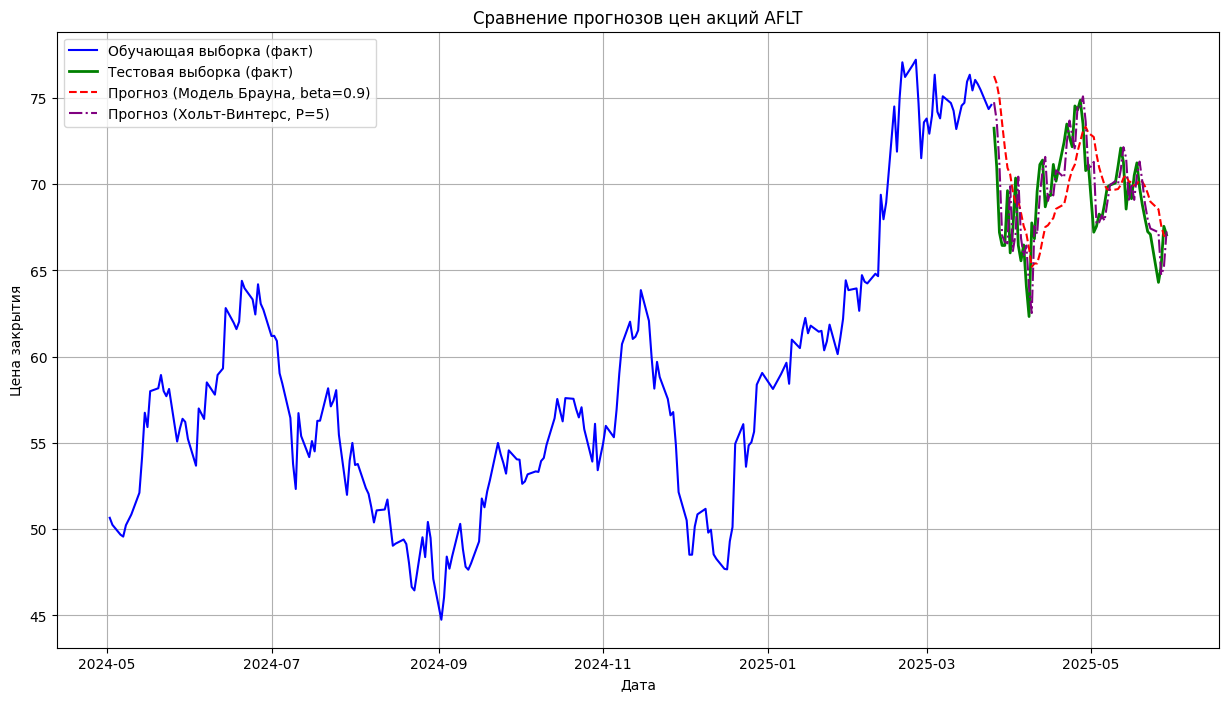


--- Сравнение метрик качества прогнозирования ---
      Модель Брауна  Хольт-Винтерс
MAE        2.433931       1.485339
MSE        8.856841       3.687422
RMSE       2.976045       1.920266
MAPE       3.539472       2.159516


In [20]:
# Оценка модели Брауна
brown_errors = None
if not brown_predictions.empty:
    brown_residuals = test - brown_predictions
    evaluate_model_adequacy(brown_residuals, "Модель Брауна", num_model_params=2) # 2 параметра (a0, a1)
    brown_errors = calculate_forecast_errors(test, brown_predictions, "Модель Брауна")
else:
    print("\nПропущена оценка модели Брауна из-за ошибок при прогнозировании.")

# Оценка модели Хольта-Винтерса
holt_winters_errors = None
if not holt_winters_predictions.empty:
    holt_winters_residuals = test - holt_winters_predictions
    evaluate_model_adequacy(holt_winters_residuals, "Модель Хольта-Винтерса", num_model_params=3) # 3 параметра (alpha, beta, gamma)
    holt_winters_errors = calculate_forecast_errors(test, holt_winters_predictions, "Модель Хольта-Винтерса")
else:
    print("\nПропущена оценка модели Хольта-Винтерса из-за ошибок при прогнозировании.")

# Визуализация результатов
plt.figure(figsize=(15, 8))
plt.plot(train.index, train, label='Обучающая выборка (факт)', color='blue')
plt.plot(test.index, test, label='Тестовая выборка (факт)', color='green', linewidth=2)

if not brown_predictions.empty:
    plt.plot(brown_predictions.index, brown_predictions, 
             label=f'Прогноз (Модель Брауна, beta={beta_brown})', color='red', linestyle='--')
if not holt_winters_predictions.empty:
    plt.plot(holt_winters_predictions.index, holt_winters_predictions, 
             label=f'Прогноз (Хольт-Винтерс, P={seasonal_period})', color='purple', linestyle='-.')

plt.title('Сравнение прогнозов цен акций AFLT')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()

# Сводная таблица ошибок для сравнения
error_data = {}
if brown_errors:
    error_data['Модель Брауна'] = brown_errors
if holt_winters_errors:
    error_data['Хольт-Винтерс'] = holt_winters_errors

if error_data:
    error_comparison_df = pd.DataFrame(error_data)
    print("\n--- Сравнение метрик качества прогнозирования ---")
    print(error_comparison_df)
else:
    print("\nНе удалось рассчитать метрики ошибок ни для одной из моделей.")



## Задание 2
Покажите, что линейная модель Брауна является частным случаем двухпараметрической модели экспоненциального сглаживания  Хольта

Чтобы показать, что линейная модель Брауна является частным случаем двухпараметрической модели Хольта, мы сравним уравнения обновления параметров обеих моделей.

1. Линейная модель Брауна

Как указано в описании лабораторной работы, уравнения для обновления параметров $a_0(k)$ (уровень) и $a_1(k)$ (тренд) в модели Брауна на шаге $k$ следующие:

$a_0(k) = a_0(k-1) + a_1(k-1) + (1-\beta^2) \cdot \varepsilon(k)$
$a_1(k) = a_1(k-1) + (1-\beta)^2 \cdot \varepsilon(k)$
где:

$\beta$ – коэффициент дисконтирования в модели Брауна.
$\varepsilon(k)$ – ошибка прогноза на один шаг вперед, сделанного на шаге $k-1$: $\varepsilon(k) = y(k) - \hat{y}_1(k) = y(k) - (a_0(k-1) + a_1(k-1))$
$y(k)$ – фактическое значение временного ряда в момент $k$.
Прогноз на $\tau$ шагов вперед из точки $k$: $\hat{y}(k+\tau) = a_0(k) + a_1(k) \cdot \tau$.

2. Двухпараметрическая модель Хольта (линейный тренд)

Модель Хольта использует два параметра сглаживания: $\alpha_H$ для уровня и $\beta_H$ для тренда. Уравнения модели Хольта в наиболее распространенной форме (используя $\ell_k$ для уровня и $b_k$ для тренда в момент $k$):

Уровень: $\ell_k = \alpha_H y_k + (1-\alpha_H)(\ell_{k-1} + b_{k-1})$
Тренд: $b_k = \beta_H (\ell_k - \ell_{k-1}) + (1-\beta_H) b_{k-1}$
Прогноз на $\tau$ шагов вперед из точки $k$: $\hat{y}_{k+\tau|k} = \ell_k + \tau \cdot b_k$.
Эти уравнения можно переписать в форме коррекции ошибки. Пусть $e_k = y_k - (\ell_{k-1} + b_{k-1})$ – ошибка прогноза на один шаг вперед, сделанного на шаге $k-1$.

Тогда уравнение для уровня: $\ell_k = \alpha_H y_k + (1-\alpha_H)(\ell_{k-1} + b_{k-1})$ $\ell_k = \alpha_H ((\ell_{k-1} + b_{k-1}) + e_k) + (1-\alpha_H)(\ell_{k-1} + b_{k-1})$ $\ell_k = \alpha_H (\ell_{k-1} + b_{k-1}) + \alpha_H e_k + (\ell_{k-1} + b_{k-1}) - \alpha_H (\ell_{k-1} + b_{k-1})$ $\ell_k = (\ell_{k-1} + b_{k-1}) + \alpha_H e_k$

Уравнение для тренда: $b_k = \beta_H (\ell_k - \ell_{k-1}) + (1-\beta_H) b_{k-1}$ Разность уровней $\ell_k - \ell_{k-1} = ((\ell_{k-1} + b_{k-1}) + \alpha_H e_k) - \ell_{k-1} = b_{k-1} + \alpha_H e_k$. Подставляем это в уравнение для тренда: $b_k = \beta_H (b_{k-1} + \alpha_H e_k) + (1-\beta_H) b_{k-1}$ $b_k = \beta_H b_{k-1} + \beta_H \alpha_H e_k + b_{k-1} - \beta_H b_{k-1}$ $b_k = b_{k-1} + \alpha_H \beta_H e_k$

Таким образом, уравнения модели Хольта в форме коррекции ошибки:

$\ell_k = \ell_{k-1} + b_{k-1} + \alpha_H e_k$
$b_k = b_{k-1} + \alpha_H \beta_H e_k$
$e_k = y_k - (\ell_{k-1} + b_{k-1})$

3. Сравнение моделей

Теперь сравним уравнения модели Брауна с уравнениями модели Хольта в форме коррекции ошибки. Предположим, что компоненты моделей соответствуют друг другу:

Уровень Брауна $a_0(k)$ соответствует уровню Хольта $\ell_k$.
Тренд Брауна $a_1(k)$ соответствует тренду Хольта $b_k$.
Ошибка Брауна $\varepsilon(k)$ соответствует ошибке Хольта $e_k$.
Уравнения Брауна:

$a_0(k) = a_0(k-1) + a_1(k-1) + (1-\beta^2) \varepsilon(k)$
$a_1(k) = a_1(k-1) + (1-\beta)^2 \varepsilon(k)$
Уравнения Хольта (в форме коррекции ошибки, с заменой $\ell \rightarrow a_0, b \rightarrow a_1, e \rightarrow \varepsilon$):

$a_0(k) = a_0(k-1) + a_1(k-1) + \alpha_H \varepsilon(k)$
$a_1(k) = a_1(k-1) + \alpha_H \beta_H \varepsilon(k)$
Чтобы эти две системы уравнений были идентичны, коэффициенты при $\varepsilon(k)$ должны совпадать:

Из уравнений для уровня (сравнивая коэффициенты при $\varepsilon(k)$): $1-\beta^2 = \alpha_H$

Из уравнений для тренда (сравнивая коэффициенты при $\varepsilon(k)$): $(1-\beta)^2 = \alpha_H \beta_H$

Теперь мы можем выразить параметры Хольта ($\alpha_H, \beta_H$) через параметр Брауна ($\beta$):

$\alpha_H = 1-\beta^2$
Подставим $\alpha_H$ во второе уравнение: $(1-\beta)^2 = (1-\beta^2) \beta_H$ $\beta_H = \frac{(1-\beta)^2}{1-\beta^2}$ Поскольку $1-\beta^2 = (1-\beta)(1+\beta)$, то: $\beta_H = \frac{(1-\beta)^2}{(1-\beta)(1+\beta)} = \frac{1-\beta}{1+\beta}$

Вывод

Линейная модель Брауна является частным случаем двухпараметрической модели экспоненциального сглаживания Хольта, когда параметры сглаживания Хольта $\alpha_H$ (для уровня) и $\beta_H$ (для тренда) связаны с коэффициентом дисконтирования Брауна $\beta$ следующим образом:

$\alpha_H = 1-\beta^2$
$\beta_H = \frac{1-\beta}{1+\beta}$
Это означает, что если в модели Хольта выбрать параметры сглаживания согласно этим формулам, то она будет давать те же результаты, что и линейная модель Брауна с коэффициентом дисконтирования $\beta$. Модель Брауна, таким образом, накладывает определенное ограничение на соотношение между параметрами сглаживания уровня и тренда, в то время как в общей модели Хольта эти параметры могут выбираться независимо.